In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [6]:
# Create a DataFrame with the scaled data
df_scaled_data = df_market_data.copy()

# Normalize the selected column
scaled_data = scaler.fit_transform(df_market_data)

scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original data
### Crypto names already appears in the dataframe as the index column

# Set the coinid column as index
### Already coin_id is the index column

# Display sample data
scaled_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

In [8]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)


C:\Users\Viraj Tharindu\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Viraj Tharindu\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data_df = pd.DataFrame({"Number of Clusters (k)": k_values, "Inertia": inertia_values})

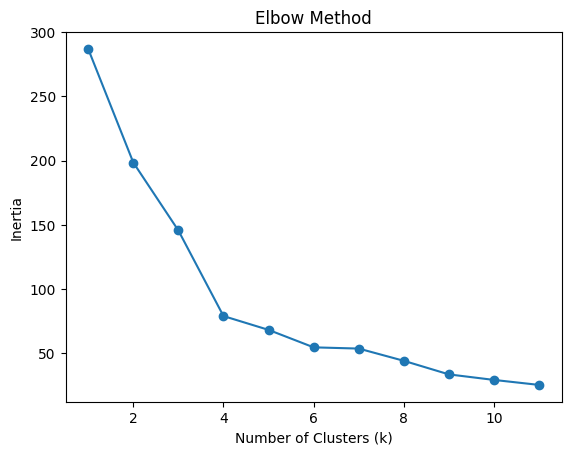

In [10]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialise the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4)

In [12]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)

KMeans(n_clusters=4)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(scaled_df)

# Print the resulting array of cluster values.
print(cluster_labels)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 1 3 0 0 2
 0 0 0 0]


In [14]:
# Create a copy of the DataFrame
clustered_df = scaled_df.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df['Cluster'] = cluster_labels

# Display sample data
clustered_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [16]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Colour the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = clustered_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['crypto_name'],
    title='Cryptocurrency Price Change',
    xlabel='Price Change (%) in 24h',
    ylabel='Price Change (%) in 7d',
    width=800,
    height=600,
    legend='top_right'
)

scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimise Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
pca_data = pca.fit_transform(scaled_df)

# View the first five rows of the DataFrame.
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])
pca_df.head(5)

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [19]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

explained_variance = pca.explained_variance_ratio_
print("Explained variance for each principal component:", explained_variance)


Explained variance for each principal component: [0.3719856  0.34700813 0.17603793]


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.3719856+0.34700813+0.17603793=0.89503166

In [20]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data

# Set the coinid column as index

# Display sample data
pca_df.head()

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = range(1, 12)

In [22]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for k in k_values_pca:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia_values_pca.append(kmeans.inertia_)


In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values_pca, 'inertia': inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame(elbow_data)

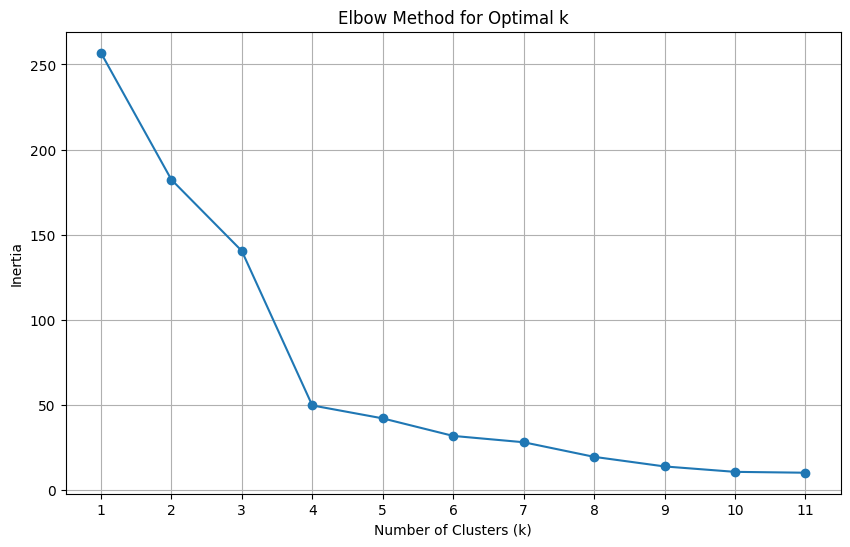

In [24]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(elbow_data_pca['k'], elbow_data_pca['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values_pca)
plt.grid(True)
plt.show()

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialise the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4)

In [26]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

KMeans(n_clusters=4)

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels_pca = kmeans.predict(pca_df)

# Print the resulting array of cluster values.
print(cluster_labels_pca)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


In [28]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_pca_df['Cluster'] = cluster_labels_pca

# Display sample data
clustered_pca_df.head(5)


,PC1,PC2,PC3,Cluster
0,-0.600667,0.842760,0.461595,0
1,-0.458261,0.458466,0.952877,0
2,-0.433070,-0.168126,-0.641752,1
3,-0.471835,-0.222660,-0.479053,1
4,-1.157800,2.041209,1.859715,0


In [29]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Colour the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = clustered_pca_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['crypto_name'],
    title='Cryptocurrency Price Change',
    xlabel='Price Change (%) in 24h',
    ylabel='Price Change (%) in 7d',
    width=800,
    height=600,
    legend='top_right'
)

scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2)

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

In [30]:
# Composite plot to contrast the Elbow curves

elbow_data_df.hvplot.line(x='Number of Clusters (k)',
                          y='Inertia', 
                          label='Elbow Method') *\
pd.DataFrame({"Number of Clusters (k)": k_values_pca,
              "Inertia": inertia_values_pca}).hvplot.line(x='Number of Clusters (k)', 
                                                          y='Inertia', label='Optimal k')

:Overlay
   .Curve.Elbow_Method :Curve   [Number of Clusters (k)]   (Inertia)
   .Curve.Optimal_k    :Curve   [Number of Clusters (k)]   (Inertia)

In [31]:

# Combine the dataframes
combined_df = pd.concat([clustered_df, clustered_pca_df], ignore_index=True)

# Convert the plot using hvPlot
scatter_plot = combined_df.hvplot.scatter(x='price_change_percentage_24h',
                                          y='price_change_percentage_7d', 
                                          c='Cluster', marker='o', 
                                          label='Original Data') * \
combined_df.hvplot.scatter(x='PC1', y='PC2', c='Cluster', marker='x', label='PCA Data')

scatter_plot.opts(xlabel='Price Change (%) in 24h', 
                  ylabel='Price Change (%) in 7d', 
                  title='Cryptocurrency Price Change',
                  legend_position='top_right')

:Overlay
   .Scatter.Original_Data :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)
   .Scatter.PCA_Data      :Scatter   [PC1]   (PC2,Cluster)

#### Answer the following question:

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Dimensionality Reduction, Sensitivity to Noise, Prevntion Overfitting

In [32]:
original_data_df = df_market_data.copy()

# Display sample data
original_data_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [33]:
#####################################################################

In [34]:
# Create a list with the number of k-values from 1 to 11
k_values_ori = range(1, 12)

In [35]:
# Create an empty list to store the inertia values
inertia_values_ori = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values_ori:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(original_data_df)
    inertia_values_ori.append(kmeans.inertia_)

In [36]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_ori = {"k": k_values_ori, "inertia": inertia_values_ori}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data_ori_df = pd.DataFrame({"Number of Clusters (k)": k_values_ori, "Inertia": inertia_values_ori})

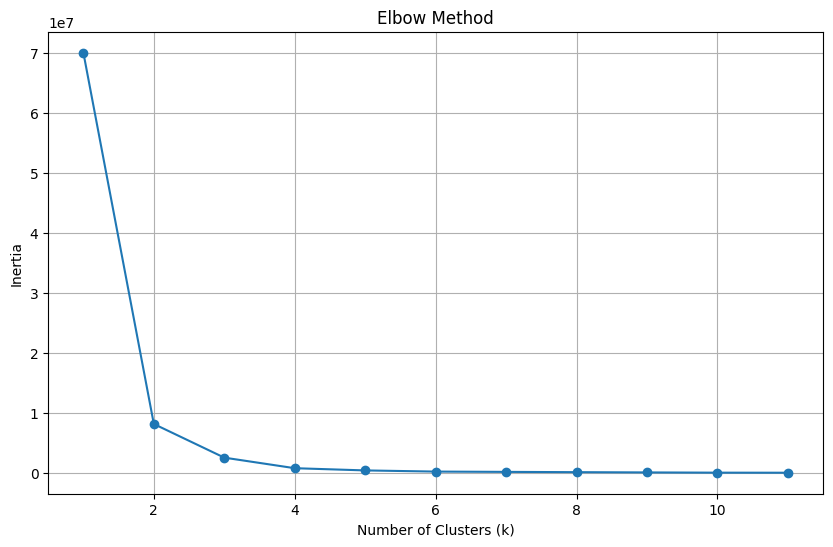

In [37]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(k_values_ori, inertia_values_ori, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 2

### Cluster Cryptocurrencies with K-means Using the Original Data

In [38]:
# Initialise the K-Means model using the best value for k
kmeans = KMeans(n_clusters=2)

In [39]:
# Fit the K-Means model using the scaled data
kmeans.fit(original_data_df)

KMeans(n_clusters=2)

In [40]:
# Predict the clusters to group the cryptocurrencies using the scaled data
ori_cluster_labels = kmeans.predict(original_data_df)

# Print the resulting array of cluster values.
print(ori_cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0]


In [41]:
# Create a copy of the DataFrame
ori_clustered_df = original_data_df.copy()

In [42]:
# Add a new column to the DataFrame with the predicted clusters
ori_clustered_df['Cluster'] = ori_cluster_labels

# Display sample data
ori_clustered_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [43]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Colour the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = ori_clustered_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['crypto_name'],
    title='Cryptocurrency Price Change',
    xlabel='Price Change (%) in 24h',
    ylabel='Price Change (%) in 7d',
    width=800,
    height=600,
    legend='top_right'
)

scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

### Optimise Clusters with Principal Component Analysis.

In [44]:
# Create a PCA model instance and set `n_components=3`.
ori_pca = PCA(n_components=3)

In [45]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
ori_pca_data = ori_pca.fit_transform(original_data_df)

# View the first five rows of the DataFrame.
ori_pca_df = pd.DataFrame(data=ori_pca_data, columns=['PC1', 'PC2', 'PC3'])
ori_pca_df.head(5)

,PC1,PC2,PC3
0,-341.800963,-51.366775,12.525471
1,-249.420466,24.117548,-14.231466
2,-402.614721,-118.710737,24.838397
3,-406.752437,-79.487286,1.566331
4,-382.429948,-103.431959,16.753073


In [46]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

explained_variance = ori_pca.explained_variance_ratio_
print("Explained variance for each principal component:", explained_variance)


Explained variance for each principal component: [9.76037313e-01 2.30282949e-02 7.48308214e-04]


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** 9.76037313e-01 + 2.30282949e-02 + 7.48308214e-04

In [47]:
# Create a new DataFrame with the PCA data.
ori_pca_df = pd.DataFrame(data=ori_pca_data, columns=['PC1', 'PC2', 'PC3'])

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data

# Set the coinid column as index

# Display sample data
ori_pca_df.head()

,PC1,PC2,PC3
0,-341.800963,-51.366775,12.525471
1,-249.420466,24.117548,-14.231466
2,-402.614721,-118.710737,24.838397
3,-406.752437,-79.487286,1.566331
4,-382.429948,-103.431959,16.753073


### Find the Best Value for k Using the PCA Data

In [48]:
# Create a list with the number of k-values from 1 to 11
k_val_pca = range(1, 12)

In [49]:
# Create an empty list to store the inertia values
inertia_val_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for k in k_val_pca:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(ori_pca_df)
    inertia_val_pca.append(kmeans.inertia_)


In [50]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_ori_pca = {'k': k_val_pca, 'inertia': inertia_val_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_ori_pca_df = pd.DataFrame(elbow_data_ori)

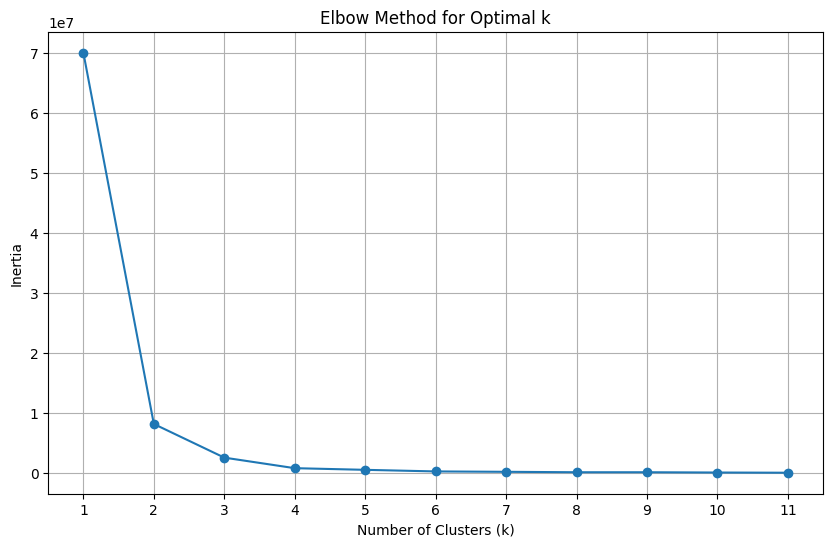

In [51]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(elbow_data_ori_pca['k'], elbow_data_ori_pca['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_val_pca)
plt.grid(True)
plt.show()

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 2


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [52]:
# Initialise the K-Means model using the best value for k
kmeans_ori_pca = KMeans(n_clusters=2)

In [53]:
# Fit the K-Means model using the PCA data
kmeans_ori_pca.fit(ori_pca_df)

KMeans(n_clusters=2)

In [54]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels_ori_pca = kmeans_ori_pca.predict(ori_pca_df)

In [55]:
# Create a copy of the DataFrame with the PCA data
ori_pca_clustered_df = ori_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
ori_pca_clustered_df['Cluster'] = cluster_labels_ori_pca

# Display sample data
ori_pca_clustered_df.head(5)

,PC1,PC2,PC3,Cluster
0,-341.800963,-51.366775,12.525471,1
1,-249.420466,24.117548,-14.231466,1
2,-402.614721,-118.710737,24.838397,1
3,-406.752437,-79.487286,1.566331,1
4,-382.429948,-103.431959,16.753073,1


In [56]:
scatter_plot = ori_pca_clustered_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['crypto_name'],
    title='Cryptocurrency Price Change',
    xlabel='Price Change (%) in 24h',
    ylabel='Price Change (%) in 7d',
    width=800,
    height=600,
    legend='top_right'
)

scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2)

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

In [57]:
# Composite plot to contrast the Elbow curves

elbow_data_ori_df.hvplot.line(x='Number of Clusters (k)',
                          y='Inertia', 
                          label='Elbow Method') *\
pd.DataFrame({"Number of Clusters (k)": k_val_pca,
              "Inertia": inertia_val_pca}).hvplot.line(x='Number of Clusters (k)', 
                                                          y='Inertia', label='Elbow Method for Optimal k')

:Overlay
   .Curve.Elbow_Method               :Curve   [Number of Clusters (k)]   (Inertia)
   .Curve.Elbow_Method_for_Optimal_k :Curve   [Number of Clusters (k)]   (Inertia)

In [58]:

# Combine the dataframes
combined_df = pd.concat([ori_clustered_df, ori_pca_clustered_df], ignore_index=True)

# Convert the plot using hvPlot
scatter_plot = combined_df.hvplot.scatter(x='price_change_percentage_24h',
                                          y='price_change_percentage_7d', 
                                          c='Cluster', marker='o', 
                                          label='Original Data') * \
combined_df.hvplot.scatter(x='PC1', y='PC2', c='Cluster', marker='x', label='PCA Data')

scatter_plot.opts(xlabel='Price Change (%) in 24h', 
                  ylabel='Price Change (%) in 7d', 
                  title='Cryptocurrency Price Change',
                  legend_position='top_right')

:Overlay
   .Scatter.Original_Data :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)
   .Scatter.PCA_Data      :Scatter   [PC1]   (PC2,Cluster)